In [1]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [2]:
from PIL import Image
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

img_path = './downloads'


def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    r = list_files(img_path)
    for img in r:
        if "DS_Store" not in img:
            try:
                data = np.array(Image.open(img))
                heights.append(data.shape[0])
                widths.append(data.shape[1])
                img_count += 1
            except (IOError, SyntaxError) as e:
                print('Bad file:', img) # print out the names of corrupt files
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print('\n')
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

/Users/directioner0829/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


Bad file: ./downloads/test/chinese_child/18. Gemini-s-Store-Summer-Child-Cheongsam-Tang-Suit-Female-Child-Flower-Dress-Fluid-Chinese-Style-Baby.jpg
Bad file: ./downloads/test/chinese_child/24. 2018-New-Fashionista-Child-Chiffon-Princess-Dress-Pastoral-Style-Chinese-Children-Cute-Girl-Sweet-Fluffy-Dress.jpg
Bad file: ./downloads/test/chinese_child/46. Russia-Hot-sale-Chinese-Kid-Child-Girl-Flower-Cheongsam-Dress-girls-Qipao-Faux-Silk-Clothes-free.jpg
Bad file: ./downloads/test/ghanaian_child/14. 3o3bpd1avp7d2tgif8.jpg
Bad file: ./downloads/train/chinese_person/57. chinese-chef-ken-hom.jpg
Bad file: ./downloads/train/ghanaian_person/19. d5abf5d44da3bd73.jpg
Bad file: ./downloads/train/ghanaian_person/20. austin-grabish-portrait-for-bio.jpg


Average Height: 588.9236363636363
Max Height: 860
Min Height: 80


Average Width: 588.9236363636363
Max Width: 860
Min Width: 80


In [3]:
labels = [np.array([1,0]), np.array([0, 1])]

def label_img(path, labels):
    if 'chinese'in path: return labels[0]
    elif 'ghanaian' in path: return labels[1]


In [4]:
def show_img(data_set, element):
    print('\n')
    img = data_set[element]
    plt.imshow(img[0], cmap = 'gist_gray')
    if img[1] is not None:
        if img[1][0] == 1:
            print("Chinese")
        else:
            print("Ghanaian")    

In [5]:
import numpy as np
import PIL

IMG_SIZE = 300

def load_data(dir):
    data = []
    data_imgs = []
    data_labels = []
    r = list_files(dir)
    for img in r:
        try :
            label = label_img(img, labels)
            if "DS_Store" not in img:
                img_data = Image.open(img)
                np_img = np.array(img_data)
                img_data = img_data.convert('L')
                img_data = img_data.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
                data.append([np.array(img_data), label])
                data_imgs.append((np_img))
#                 print("type ", type(img_data))
                data_labels.append(label)
        except (IOError, SyntaxError) as e:
                print('Bad file:', img) # print out the names of corrupt files
            
    shuffle(data)
    data_imgs = np.asarray(data_imgs, dtype=np.ndarray)
    data_labels = np.asarray(data_labels, dtype=np.ndarray)
    return data, data_imgs, data_labels

Bad file: downloads/train/chinese_person/57. chinese-chef-ken-hom.jpg
Bad file: downloads/train/ghanaian_person/19. d5abf5d44da3bd73.jpg
Bad file: downloads/train/ghanaian_person/20. austin-grabish-portrait-for-bio.jpg
134


Chinese


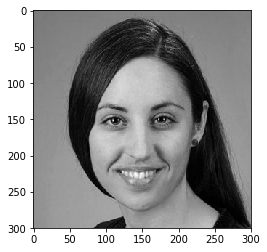

In [6]:
training_dir = "downloads/train"
train_data, train_img, train_label = load_data(training_dir)
print(len(train_data))
show_img(train_data, 13)

Bad file: downloads/test/chinese_child/18. Gemini-s-Store-Summer-Child-Cheongsam-Tang-Suit-Female-Child-Flower-Dress-Fluid-Chinese-Style-Baby.jpg
Bad file: downloads/test/chinese_child/24. 2018-New-Fashionista-Child-Chiffon-Princess-Dress-Pastoral-Style-Chinese-Children-Cute-Girl-Sweet-Fluffy-Dress.jpg
Bad file: downloads/test/chinese_child/46. Russia-Hot-sale-Chinese-Kid-Child-Girl-Flower-Cheongsam-Dress-girls-Qipao-Faux-Silk-Clothes-free.jpg
Bad file: downloads/test/ghanaian_child/14. 3o3bpd1avp7d2tgif8.jpg


Chinese


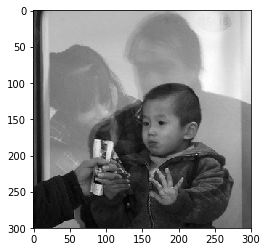

In [7]:
testing_dir = 'downloads/test'
test_data, test_img, test_label = load_data(testing_dir)
show_img(test_data, 10)

In [8]:
print("Shape ", train_img.shape)
print("Size of train_label:",len(train_label))
print(len(test_data))

Shape  (134,)
Size of train_label: 134
141


In [9]:
from keras.utils import to_categorical

# train_img = train_img.reshape((-1, IMG_SIZE, IMG_SIZE, 1))
# train_img = train_img.astype('float32') / 255
# test_img = test_img.reshape((-1, IMG_SIZE, IMG_SIZE, 1))
# test_img = test_img.astype('float32') / 255


trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

Using TensorFlow backend.


In [ ]:
import keras
from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#added classifier
# model.add(layers.Flatten()) 
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))


model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_2

In [ ]:
# model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# model.fit(trainImages, train_label, epochs=5, batch_size=64)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


In [ ]:
test_loss, test_acc = model.evaluate(testImages, testLabels)
print(test_acc)